# Ford GoBike System Data Exploration
### by *Nattacha Paksung*

## Contents
- [Preliminary Wrangling](#wrangling)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)

<a id='wrangling'></a>
## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2017.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Data gathering
Read `2017-fordgobike-tripdata.csv` file, which can be downloaded from [Ford GoBike trip history data](https://s3.amazonaws.com/fordgobike-data/index.html) [1].

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('2017-fordgobike-tripdata.csv')

### Data assessing
Look through the data set visually and programmatically.

In [3]:
# observe first few rows of the dataset
gobike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


In [4]:
# high-level overview of data shape and composition
print(gobike.shape)
print(gobike.info())

(519700, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB
None


Check the accuracy of the values in the data set.

In [5]:
# Check if start_station_id is corresponding with start_station_name. This should return 0
(gobike.start_station_id.value_counts().values != gobike.start_station_name.value_counts().values).sum()

0

In [6]:
# Check if end_station_id is corresponding with end_station_name. This should return 0
(gobike.end_station_id.value_counts().values != gobike.end_station_name.value_counts().values).sum()

0

#### Issues found
- There are missing values in `member_birth_year` and `member_gender`.
- Data type issues:
    - `start_time` and `end_time` should be datetime.
    - `start_station_id`, `end_station_id` and `bike_id` should be string.
- The unit of `duration_sec` is second and it may be more realistic if the unit is minute.
- `member_birth_year` can represent `age` of the member.
- Time of a day, day of a week and month of the year can be extracted from datetime values in `start_time`.
- Distance can be calculated from latitude and longitude.

### Data Cleaning
Make the data clean and tidy for analysis.

In [7]:
# make a copy of data set
gobike_clean = gobike.copy()

#### Define
Replace empty cells in `member_gender` with "Other". The empty cells in `member_birth_rate` are remained as NaN.

#### Code

In [8]:
gobike_clean.member_gender.fillna('Other',inplace=True)

#### Test

In [9]:
# Check the values in 'member_gender'
gobike_clean.member_gender.value_counts()

Male      348318
Female     98621
Other      72761
Name: member_gender, dtype: int64

#### Define
Change type of data into more appropiate ones.

#### Code

In [10]:
# use to_datetime() to change data type to datetime
gobike_clean.start_time = pd.to_datetime(gobike_clean.start_time)
gobike_clean.end_time = pd.to_datetime(gobike_clean.end_time)

# use astype() to the change data type
gobike_clean.start_station_id = gobike_clean.start_station_id.astype(str)
gobike_clean.end_station_id = gobike_clean.end_station_id.astype(str)
gobike_clean.bike_id = gobike_clean.bike_id.astype(str)

#### Test

In [11]:
# check datatype of each variable
print(gobike_clean.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
dtype: object


#### Define
Create column `duration_min` that convert duration in seconds from `duration_sec` to minute.

#### Code

In [12]:
# assign duration_sec/3600 into column 'duration_hour'
gobike_clean['duration_min'] = round(gobike_clean.duration_sec/60,2)

#### Test

In [13]:
# see first few rows of data set after adding column
gobike_clean.duration_min.head()

0    1335.17
1    1313.33
2     762.80
3    1036.20
4     726.72
Name: duration_min, dtype: float64

#### Define
Create column `age` and assign 2017 subtracted by values in `member_birth_year` when the values are known.

#### Code

In [14]:
# define function to calculate age from birth year
def age(var):
    if var != np.nan:
        return (2017 - var)
    
# assign age of member to new column 'age'
gobike_clean['age'] = gobike_clean.member_birth_year.apply(age)

#### Test

In [15]:
# see first few rows of data set after adding column
gobike_clean.age.head()

0    30.0
1    52.0
2     NaN
3     NaN
4    20.0
Name: age, dtype: float64

#### Define
Extract time of a day from `start_time` and categorize it into '0am-6am', '6am-12am', '12am-6pm', '6pm-12pm'.

#### Code

In [16]:
# define function to categorize range of time in a day
def timeday(hour):
    if 0<hour<=6:
        return '0am-6am'
    elif 6<hour<=12:
        return '6am-12am'
    elif 12<hour<=18:
        return '12am-6pm'
    else:
        return '6pm-12pm'
    
# assign range of time to new column 'time_range'
gobike_clean['time_range'] = gobike_clean.start_time.dt.hour.apply(timeday)

#### Test

In [17]:
# see first few rows of data set after adding column
gobike_clean.time_range.head()

0    12am-6pm
1    12am-6pm
2    6pm-12pm
3    12am-6pm
4    12am-6pm
Name: time_range, dtype: object

#### Define
Extract the day of week from values in `start_time` and store it in `day_of_week`. Classify `day_of_week` into weekdays and weekends and store in `day_type`.

#### Code

In [18]:
# create 'day_of_week' to store day of the week and 'day_type' to store boolean values
gobike_clean['day_of_week'] = gobike_clean.start_time.dt.dayofweek
gobike_clean['day_type'] = gobike_clean.day_of_week.apply(lambda day: 'Weekends' if day>4 else 'Weekdays')

# map the day of week with the associated number
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
gobike_clean.day_of_week = gobike_clean.day_of_week.map(day_map)

#### Test

In [19]:
# see first few rows of data set after adding column
gobike_clean[['day_of_week','day_type']].head()

,day_of_week,day_type
0,Sunday,Weekends
1,Sunday,Weekends
2,Sunday,Weekends
3,Sunday,Weekends
4,Sunday,Weekends


#### Define
Extract the month of a year from values in `start_time` and store it in `month`.

#### Code

In [20]:
# create 'month' to store the extracted month from 'start_time'
gobike_clean['month'] = gobike_clean.start_time.dt.month_name()

#### Test

In [21]:
# see first few rows of data set after adding column
gobike_clean.month.head()

0    December
1    December
2    December
3    December
4    December
Name: month, dtype: object

#### Define
Calculate trip distance from station's latitude and longitude coordinates [[2]](https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude/43211266#43211266).

#### Code

In [22]:
# import some functions from math modules
from math import sin, cos, sqrt, atan2, radians

In [23]:
# define a function to calculate a distance in each row of data frame
def dist(row):
    
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(row['start_station_latitude'])
    lon1 = radians(row['start_station_longitude'])
    lat2 = radians(row['end_station_latitude'])
    lon2 = radians(row['end_station_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [24]:
# calculate distance and store the result in a new column 'distance'
gobike_clean['distance'] = gobike_clean.apply(dist,axis=1)

#### Test

In [25]:
# see first few rows of data set after adding columns
gobike_clean.distance.head()

0    0.943227
1    3.070691
2    0.000000
3    1.046951
4    0.636539
Name: distance, dtype: float64

#### Additional issues
- `user_type`, `member_gender`, `time_range`, `day_of_week`, `day_type` and `month` should be catergorical type.

In [26]:
# convert 'user_type', 'member_gender'and 'day_type' into categorical types
gobike_clean.user_type = gobike_clean.user_type.astype('category')
gobike_clean.member_gender = gobike_clean.member_gender.astype('category')
gobike_clean.day_type = gobike_clean.day_type.astype('category')

# convert 'time_range', 'day_of_week','month' into ordinal categorical types
order_dict = {'time_range' : ['0am-6am', '6am-12am', '12am-6pm', '6pm-12pm'],
             'day_of_week' : ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
             'month' : ['January','February','March','April','May','June','July','August','September','October',
                       'November','December']}
for var in order_dict:
    ordered_cat = pd.api.types.CategoricalDtype(ordered=True,categories = order_dict[var])
    gobike_clean[var] = gobike_clean[var].astype(ordered_cat)

In [27]:
# See types of variables in data set
gobike_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
duration_min                      float64
age                               float64
time_range                       category
day_of_week                      category
day_type                         category
month                            category
distance                          float64
dtype: object

In [28]:
# descriptive statistics for numeric variables
gobike_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,age,distance
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000,519700.000000,453159.000000,519700.000000
mean,1099.009521,37.771653,-122.363927,37.771844,-122.363236,1980.404787,18.316829,36.595213,1.587575
std,3444.146451,0.086305,0.105573,0.086224,0.105122,10.513488,57.402448,10.513488,1.010709
min,61.000000,37.317298,-122.444293,37.317298,-122.444293,1886.000000,1.020000,18.000000,0.000000
25%,382.000000,37.773492,-122.411726,37.774520,-122.410345,1974.000000,6.370000,29.000000,0.899925
50%,596.000000,37.783521,-122.398870,37.783830,-122.398525,1983.000000,9.930000,34.000000,1.400684
75%,938.000000,37.795392,-122.391034,37.795392,-122.391034,1988.000000,15.630000,43.000000,2.073144
max,86369.000000,37.880222,-121.874119,37.880222,-121.874119,1999.000000,1439.480000,131.000000,68.208192


### What is the structure of your dataset?

There are 519,700 observations in the data set with 15 features and 7 new features. Type of variables are numeric, datetime, string and categorical.

### What is/are the main feature(s) of interest in your dataset?

The trip duration and distance are the main interest in this data set. I am interested to figure out how each variables correlated to them.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- Distance should directly correlate with the duration.
- The day of week and start time of renting should have the strongest effects to the trip duration.
- Gender and age of the member may make difference to the trip duration.

<a id='univariate'></a>
## Univariate Exploration

In this section, distributions of individual variables are investigated. Let's get start with main feature of interest `duration_min`.

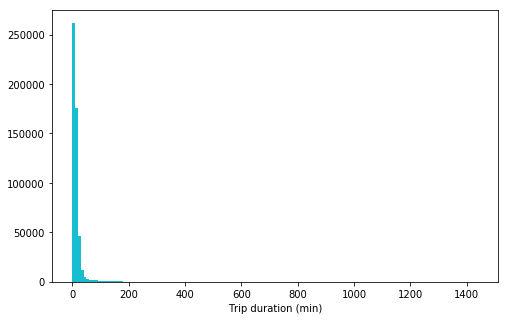

In [29]:
# start with a standard-scaled plot
bin_size = 10
bin_edge = np.arange(0,gobike_clean.duration_min.max()+bin_size,bin_size)
base_color = sb.color_palette()[-1]

plt.figure(figsize=[8, 5])
plt.hist(data = gobike_clean, x = 'duration_min',bins = bin_edge, color = base_color)
plt.xlabel('Trip duration (min)')
plt.show()

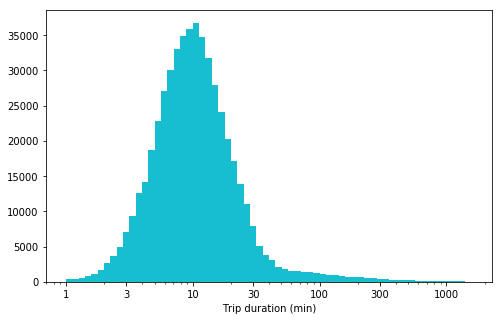

In [30]:
# there's a very longgggggg tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bin_edge = 10 ** np.arange(0, np.log10(gobike_clean.duration_min.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike_clean, x = 'duration_min', bins = bin_edge,color=base_color)
plt.xscale('log')
bin_loc = [1,3,10,30,100,300,1000]
plt.xticks(bin_loc,bin_loc)
plt.xlabel('Trip duration (min)')
plt.show()

Trip duration has a long-tailed distribution, in which there is more frequency in the shorter trip. When plotting the trip duration on a log-scale, the distribution looks uniform and unimodal. The peak showing the average trip duration of around 10 minutes.

Logically, distance and  duration should correlate each other, thus distribution should be similar.

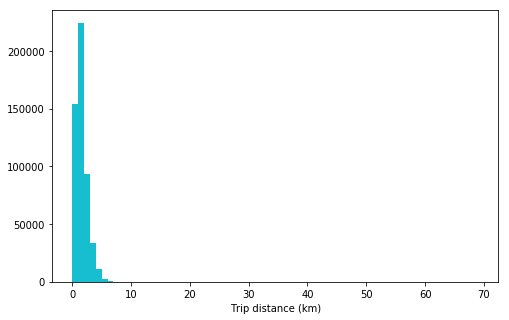

In [31]:
# plot distance with a standard-scaled plot
bin_size = 1
bin_edge = np.arange(0,gobike_clean.distance.max()+bin_size,bin_size)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike_clean, x = 'distance',bins = bin_edge, color = base_color)
plt.xlabel('Trip distance (km)')
plt.show()

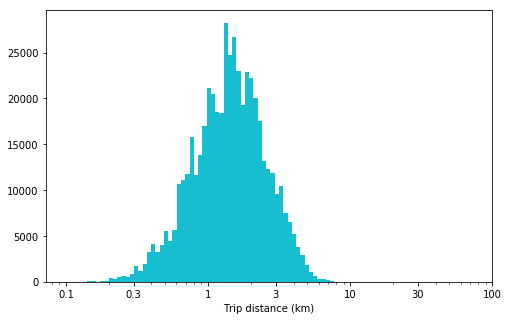

In [32]:
# let's put it on a log scale instead
log_binsize = 0.03
bin_edge = 10 ** np.arange(-1, np.log10(gobike_clean.distance.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike_clean, x = 'distance', bins = bin_edge,color=base_color)
plt.xscale('log')
bin_loc = [0.1,0.3,1,3,10,30,100]
plt.xticks(bin_loc,bin_loc)
plt.xlabel('Trip distance (km)')
plt.show()

The distribution of both features, trip duration and distance are more or less similar as expected. The peak of the distance curve is around 1.5 km. Note that distance showing here is not the actual distance but the displacement between start and end stations. These features can be engineered a bit by dividing trip distance by duration to obtain velocity.

In [33]:
# calculate velocity and store in a new column 'velocity' in km/h
gobike_clean['velocity']=gobike_clean.distance/gobike_clean.duration_min*60

# see statistic of velocity
gobike_clean.velocity.describe()

count    519700.000000
mean          8.984001
std           3.753260
min           0.000000
25%           7.123202
50%           9.396101
75%          11.416353
max          41.004543
Name: velocity, dtype: float64

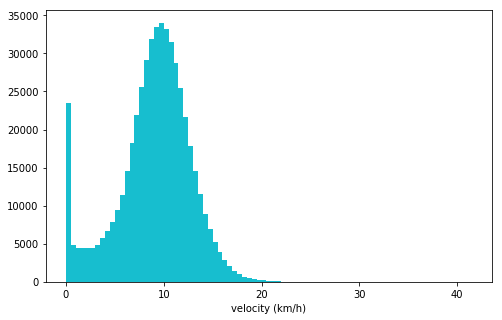

In [34]:
# plot velocity with a standard-scaled plot
bin_size = 0.5
bin_edge = np.arange(0,gobike_clean.velocity.max()+bin_size,bin_size)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike_clean, x = 'velocity',bins = bin_edge, color = base_color)
plt.xlabel('velocity (km/h)')
plt.show()

Interestingly, the frequency of velocity at zero is quite high. This is because some members started and ended at the same station and possibly some people might make a mistake booking the bike without riding it. Now, the data of velocity at zero is shown.

In [35]:
# see statistic of data, in which velocity is zero
index = gobike_clean.velocity == 0
gobike_clean.loc[index].describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,age,distance,velocity
count,18134.000000,18134.000000,18134.000000,18134.000000,18134.000000,10120.000000,18134.000000,10120.000000,18134.0,18134.0
mean,3929.115805,37.755885,-122.319393,37.755885,-122.319393,1979.466206,65.485276,37.533794,0.0,0.0
std,7632.989598,0.132568,0.147965,0.132568,0.147965,12.646948,127.216486,12.646948,0.0,0.0
min,61.000000,37.317298,-122.444293,37.317298,-122.444293,1900.000000,1.020000,18.000000,0.0,0.0
25%,686.000000,37.773311,-122.408445,37.773311,-122.408445,1970.000000,11.430000,28.000000,0.0,0.0
50%,1726.000000,37.789677,-122.394203,37.789677,-122.394203,1983.000000,28.770000,34.000000,0.0,0.0
75%,3904.000000,37.804770,-122.265192,37.804770,-122.265192,1989.000000,65.070000,47.000000,0.0,0.0
max,86369.000000,37.880222,-121.874119,37.880222,-121.874119,1999.000000,1439.480000,117.000000,0.0,0.0


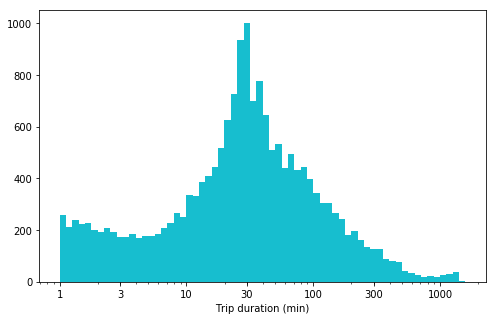

In [36]:
# plot duration with a log-scaled plot
log_binsize = 0.05
bin_edge = 10 ** np.arange(0, np.log10(gobike_clean[index].duration_min.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike_clean[index], x = 'duration_min', bins = bin_edge,color=base_color)
plt.xscale('log')
bin_loc = [1,3,10,30,100,300,1000]
plt.xticks(bin_loc,bin_loc)
plt.xlabel('Trip duration (min)')
plt.show()

From distribution of the trip duration when the velocity is zero, it looks that some people really made a wrong booking because the duration like 1-3 min is nealy impossible to travel somewhere back and forth. 

Next, let's play around with the time features

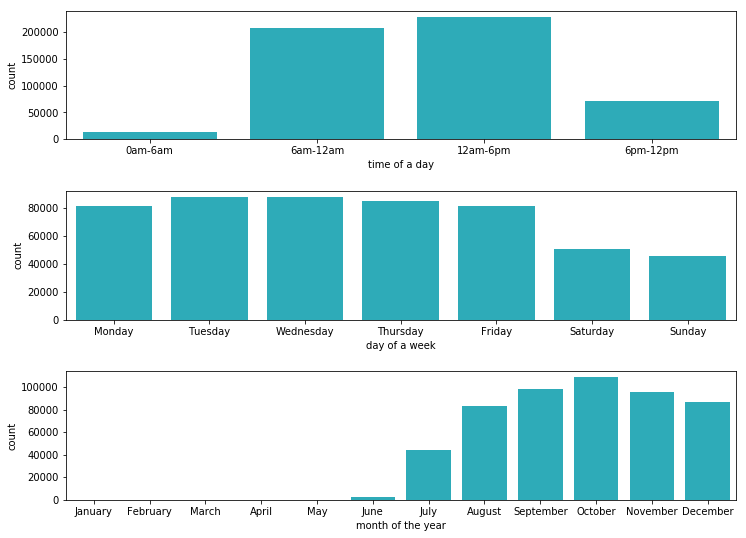

In [37]:
# plot 'time_range', 'day_of_week' and 'month' in bar plots
plt.figure(figsize=[12,9])
plt.subplots_adjust(hspace=0.4)

plt.subplot(311)
sb.countplot(x='time_range',data=gobike_clean,color=base_color)
plt.xlabel('time of a day')
plt.subplot(312)
sb.countplot(x='day_of_week',data=gobike_clean,color=base_color)
plt.xlabel('day of a week')
plt.subplot(313)
sb.countplot(x='month',data=gobike_clean,color=base_color)
plt.xlabel('month of the year')
plt.show()

The time features show that Gobike had more customers in a day time between 6am to 6 pm. More frequency is shown in weekdays (Monday to Friday) rather than weekends (Saturday and Sunday). Unexpectedly, there were no customers from January to May 2017. I suspected that Ford Gobike might not operate during that period, which was correct. Ford Gobike started operating from June 28, 2017. Before that, it was operated under the name *Bay Area Bike Share* [[3]](https://en.wikipedia.org/wiki/Ford_GoBike).

Let's continue with seeing the distribution of gender and age of customers.

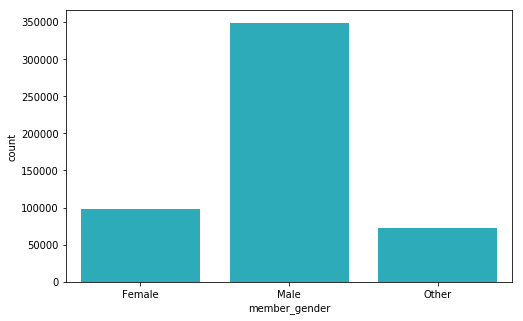

In [38]:
# plot 'member_gender' on a bar plot
plt.figure(figsize=[8,5])
sb.countplot(x='member_gender',data=gobike_clean,color=base_color)
plt.show()

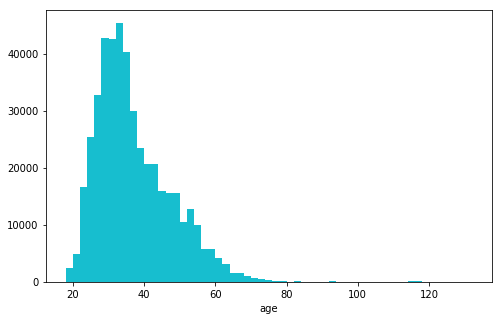

In [39]:
# plot 'age' on a standard-scaled
bin_size = 2
bin_edge = np.arange(gobike_clean.age.min(),gobike_clean.age.max()+bin_size,bin_size)

plt.figure(figsize=[8,5])
plt.hist(data=gobike_clean,x='age',bins=bin_edge, color=base_color)
plt.xlabel('age')
plt.show()

The bar plot showing gender indicates more male customers than female customers and other that is not specified. Interestingly, there are some customers whose age is more than 100 years! This is hard to believe and might be the error when input the customer data.

Let's see a little bit of information when the age of customers are more than 80.

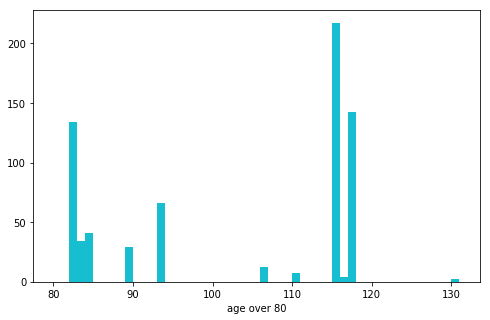

In [40]:
# filter rows whose 'age' is more than 80
index = gobike_clean.age>80
df_80 = gobike_clean.loc[index]

# see the distrubution of the filtered ages
bin_size = 1
bin_edge = np.arange(80,df_80.age.max()+bin_size,bin_size)

plt.figure(figsize=[8,5])
plt.hist(data=df_80,x='age',bins=bin_edge, color=base_color)
plt.xlabel('age over 80')
plt.show()

Most likely, the error could be the input of `member_birth_year` because of some possibilities:
- Mistyping e.g. 1889 instead of 1989
- The format of year input might be 2 degits, which make mis-interpreation for people who were born after 2000, e.g. '01 might become 1901 not 2001.

Let's assume that this is an error of 100 years, so a data set should be clean again following the assumption.

In [41]:
# revise wrong information in 'member_birth_year' and 'age'
index = gobike_clean[gobike_clean.age>100].index
gobike_clean.loc[index,'member_birth_year'] = gobike_clean.loc[index,'member_birth_year'] + 100
gobike_clean.loc[index,'age'] = gobike_clean.loc[index,'age'] - 100

# see the statistics of 'member_birth_year' and 'age'
gobike_clean[['member_birth_year','age']].describe()

,member_birth_year,age
count,453159.000000,453159.000000
mean,1980.489526,36.510474
std,10.277848,10.277848
min,1924.000000,6.000000
25%,1974.000000,29.000000
50%,1983.000000,34.000000
75%,1988.000000,43.000000
max,2011.000000,93.000000


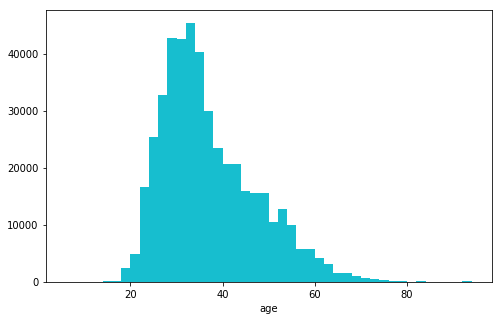

In [42]:
# plot 'age' after cleaning again on a standard-scaled
bin_size = 2
bin_edge = np.arange(gobike_clean.age.min(),gobike_clean.age.max()+bin_size,bin_size)

plt.figure(figsize=[8,5])
plt.hist(data=gobike_clean,x='age',bins=bin_edge, color=base_color)
plt.xlabel('age')
plt.show()

The distribution shape of age variable does not change much. However, outliers at the age over 100 years are gone. This should increase accuracy of data analysis.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Both `duration_min` and `distance` show long tail in the distribution. Transformation was done by plotting the varibles on log-scaled plot. The log distributions look uniform and unimodal. The peaks showing the average trip duration of around 10 minutes and the average distance of around 1.5 km.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Unfortunately, data before June 2017 are not avaible since Ford Gobike had not started operating yet. Unexpectedly,  there are some members whose age is more than 100 years, which is nearly impossible. It should be the errors by inputing data of the birth year 100 years less than the truth. The values of birth year and age were corrected accordingly.

<a id='bivariate'></a>
## Bivariate Exploration

Let's list up numerical and categorical variables of interest to start off.

In [43]:
numeric_vars = ['duration_min', 'age', 'distance', 'velocity']
categoric_vars = ['member_gender', 'time_range', 'day_of_week','day_type','month']

Look at the pairwise correlations present between numerical features in the data.

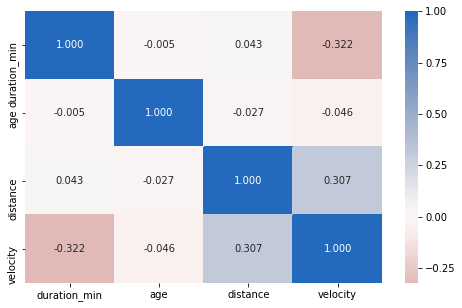

In [44]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(gobike_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

/Users/pang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/pang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


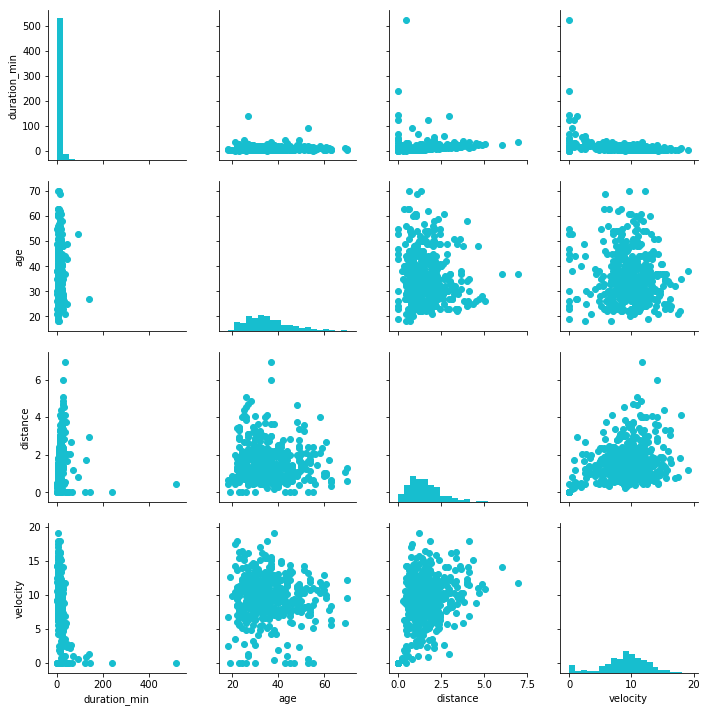

In [45]:
# plot matrix: sample 500 obseravations so that plots are clearer and
# they render faster
samples = np.random.choice(gobike_clean.shape[0], 500, replace = False)
gobike_samp = gobike_clean.loc[samples,:]

g = sb.PairGrid(data = gobike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20,color=base_color);
g.map_offdiag(plt.scatter,color=base_color);

Unexpectedly, no correlations of any variables that are strong. The cause of this could be the outliers, espcially ones of `duration_min`. Let's try removing the outliers of `duration_min` that is greater than 10 min and less than 120 min.

In [46]:
# store data without outliers in 'gobike_no_outlier'
gobike_no_outlier = gobike_clean[(10<=gobike_clean.duration_min) &
                                 (gobike_clean.duration_min<=120)]

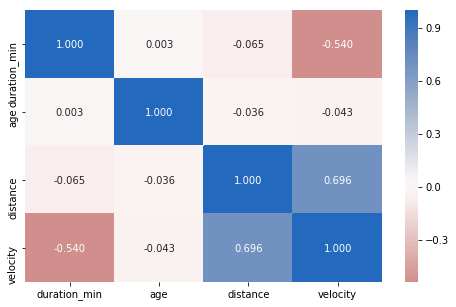

In [47]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(gobike_no_outlier[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

/Users/pang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


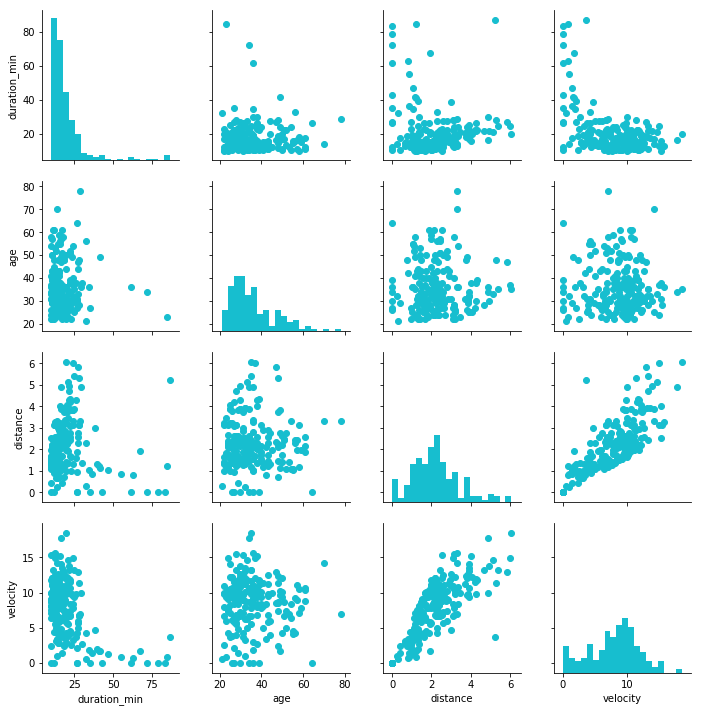

In [48]:
# plot matrix: sample 500 obseravations so that plots are clearer and
# they render faster
samples = np.random.choice(gobike_no_outlier.shape[0], 500, replace = False)
gobike_samp = gobike_no_outlier.loc[samples,:]

g = sb.PairGrid(data = gobike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20,color=base_color);
g.map_offdiag(plt.scatter,color=base_color);

The correalations look better but still very weak. This does not give any insights at the moment. Note that the velocity is calculated from distance by duration, thus the correlation of velocity and distance or duration should not be taken into account.

Let's move on to looking at how `duration_min` and `distance` (`velocity` in addition) correlate with the categorial variables.

In [49]:
# adjust category of month
month = ['June','July','August','September','October',
                       'November','December']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True,categories = month)
gobike_no_outlier.loc[:,'month'] = gobike_no_outlier.loc[:,'month'].astype(ordered_cat)

/Users/pang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<Figure size 720x720 with 0 Axes>

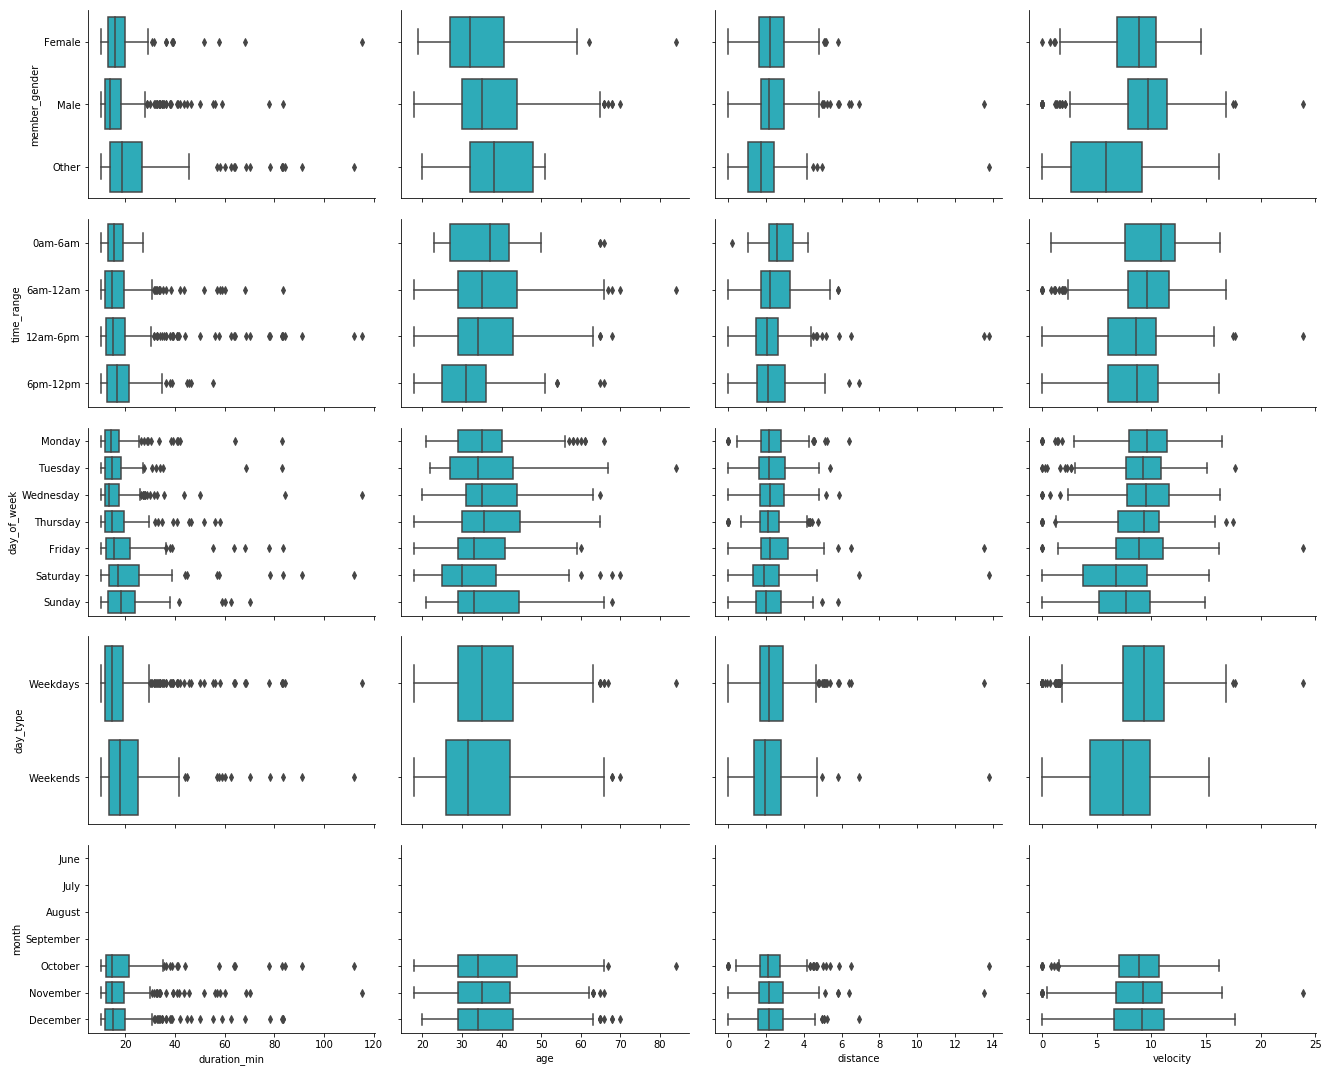

In [50]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(gobike_no_outlier.shape[0], 2000, replace = False)
gobike_samp = gobike_no_outlier.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[-1]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = gobike_samp, x_vars = numeric_vars, y_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

From the plots, some interesting points were found:

- Female members tend to ride a bike longer than male. The distance is not much different. Correspondingly, velocity of male members is averagely faster than female.
- Time of a day looks to give positive correlation with the trip duration. This makes sense when thinking of people rushing to work in the morning.
- Obviously, the trip duration in weekends is longer than weekdays.
- Month of the year does not seem to correlate with duration nor distance.
- In addition, male members are averagely older than female members. Younger people tend to use GoBike in later time than older people. The range of ages is wider in weekends than in weekdays.

Let's now look at the relationship of genders of the member and time features. Other gender is not considered.

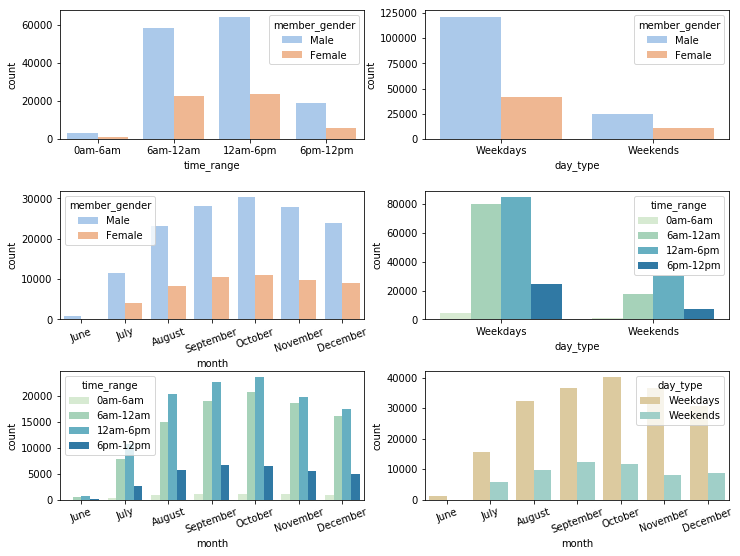

In [51]:
# plot bar chart between member_gender, time_range, day_type and month
plt.figure(figsize=[12,9])
plt.subplots_adjust(hspace=0.4)

plt.subplot(321)
sb.countplot(data=gobike_no_outlier,x='time_range',hue='member_gender',hue_order=['Male','Female'],palette='pastel')

plt.subplot(322)
sb.countplot(data=gobike_no_outlier,x='day_type',hue='member_gender',hue_order=['Male','Female'],palette='pastel')

plt.subplot(323)
sb.countplot(data=gobike_no_outlier,x='month',hue='member_gender',hue_order=['Male','Female'],palette='pastel')
plt.xticks(rotation=20)
#plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.subplot(324)
sb.countplot(data=gobike_no_outlier,x='day_type',hue='time_range',palette='GnBu')
plt.subplot(325)
sb.countplot(data=gobike_no_outlier,x='month',hue='time_range',palette='GnBu')
plt.xticks(rotation=20)

plt.subplot(326)
sb.countplot(data=gobike_no_outlier,x='month',hue='day_type',palette='BrBG')
plt.xticks(rotation=20)

plt.show()

Both male and female used GoBike the most around 12am-6pm on weekdays. The ratio of rides in the morning to afternoon is in weekends is lower than weekdays, which mean people tend to use Gobike more in the afternoon during weekends. The month feature does not show any significant correlation with the other features.

With the preliminary look at bivariate relationships that does not look correlated, let's try plotting numerical variables on the log-scaled plot and see the correlationship.

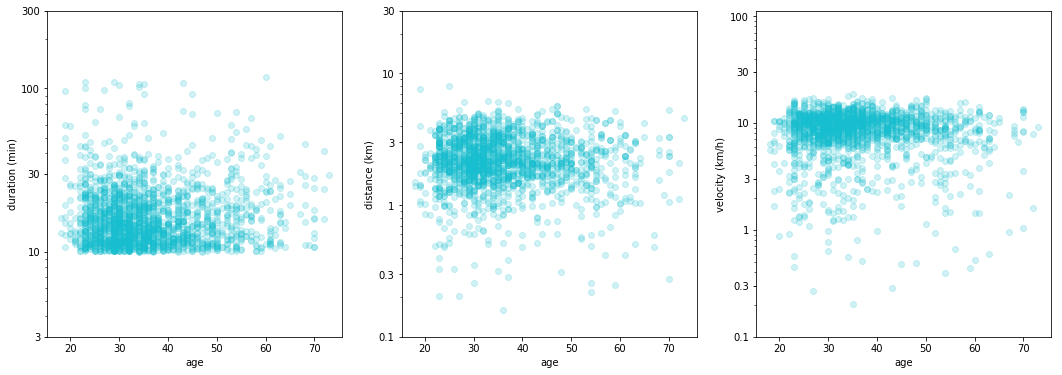

In [52]:
# plot matrix: sample 5000 obseravations so that plots are clearer and
# they render faster
samples = np.random.choice(gobike_no_outlier.shape[0], 5000, replace = False)
gobike_samp = gobike_no_outlier.loc[samples,:]

plt.figure(figsize = [18, 6])

# plot duration_min vs age
plt.subplot(131)
plt.scatter(data=gobike_samp,x='age',y='duration_min',alpha=1/5,color=base_color)
plt.xlabel('age')
plt.ylabel('duration (min)')
plt.yscale('log')
plt.yticks([3,10,30,100,300],[3,10,30,100,300])

# plot distance vs age
plt.subplot(132)
plt.scatter(data=gobike_samp,x='age',y='distance',alpha=1/5,color=base_color)
plt.xlabel('age')
plt.ylabel('distance (km)')
plt.yscale('log')
plt.yticks([0.1,0.3,1,3,10,30],[0.1,0.3,1,3,10,30])

# plot velocity vs age
plt.subplot(133)
plt.scatter(data=gobike_samp,x='age',y='velocity',alpha=1/5,color=base_color)
plt.xlabel('age')
plt.ylabel('velocity (km/h)')
plt.yscale('log')
plt.yticks([0.1,0.3,1,3,10,30,100],[0.1,0.3,1, 3,10,30,100])

plt.show()

Still, age does not show any correlation with duration, distance and velocity.

Let's try also to see the relationship between `duration_min`, `distance`, `velocity` and `user_type`.

<Figure size 720x720 with 0 Axes>

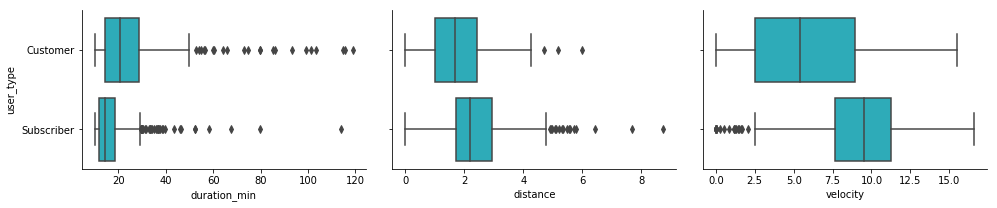

In [53]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(gobike_no_outlier.shape[0], 2000, replace = False)
gobike_samp = gobike_no_outlier.loc[samples,:]

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = gobike_samp, x_vars = ['duration_min', 'distance','velocity'], 
                y_vars = 'user_type', height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

The plots show that subscribers took shorter time and longer distance, resulted in higher velocity than customers.

Before moving the the next section, let's lastly see the relationship between `member_gender` and `user_type`.

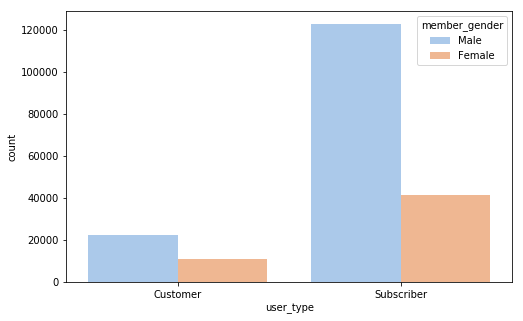

In [54]:
# countplot of user_type 
plt.figure(figsize = [8, 5])
sb.countplot(data=gobike_no_outlier,x='user_type',hue='member_gender',hue_order=['Male','Female'],palette='pastel')

There are a lot more subscribers than customers and the male members are more likely use Gobike more than the female members.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Unexpectedly, age of the member does not have relationship with the duration, distance and velocity at all. Female members tend use longer time to ride a bike than male. The distance the female and male members travelled is not much different. Correspondingly, velocity of the male members is averagely faster than the female. Time of a day is likely to have positive correlation with the trip duration. This makes sense when thinking of people rushing to work in the morning.In addition, the trip duration people spent in weekends is longer than in weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The male members are averagely older than female members. Younger people tend to use GoBike in later time than older people. The range of ages is wider in weekends than in weekdays. Yhe subscribers took shorter time with higher velocity than customers, while distances they travelled were equal. At last, the male users tend to subscibe more than the female users.

<a id='multivariate'></a>
## Multivariate Exploration

Because there is no relationship between numerical variables, the relationship the numerical variables across categorical variables is the main investigation here.

Let's start with plotting `duration_min`, `distance` and `velocity` by `time_range` and `member_gender`.

/Users/pang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


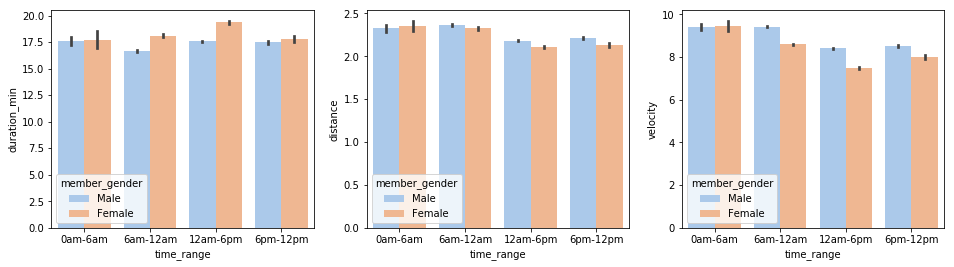

In [55]:
# duration, distance and velocity plot by time range and gender variables
plt.figure(figsize=[16,4])

plt.subplot(131)
sb.barplot(data=gobike_no_outlier,x='time_range',y='duration_min',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')

plt.subplot(132)
sb.barplot(data=gobike_no_outlier,x='time_range',y='distance',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')

plt.subplot(133)
sb.barplot(data=gobike_no_outlier,x='time_range',y='velocity',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')
plt.show()

From the first plot, it shows that the female members took longer time using GoBike during 12am-6pm than the other time ranges. The male members took shorter time during 6am-12am than the other time ranges. The second plot shows that both male and female members travel in slightly longer distance during 0am-12am than 12am-12pm. The third plot shows similar trend to the second one. That is both male and female members rode GoBike relatively fast during 0am-12am than 12am-12pm. 

Next up, `time_range` is replaced by `day_of_week`.

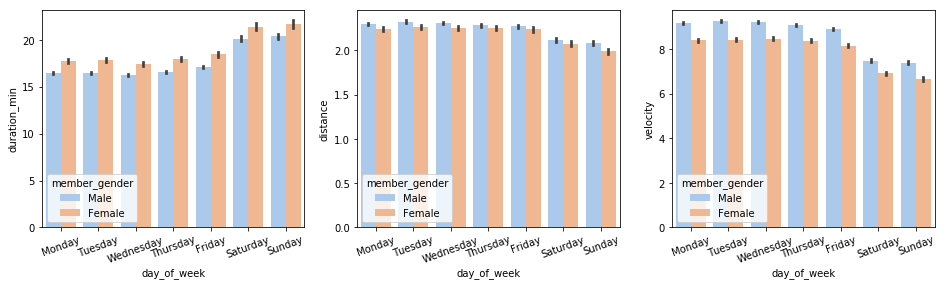

In [56]:
# duration, distance and velocity plot by day of week and gender variables
plt.figure(figsize=[16,4])

plt.subplot(131)
sb.barplot(data=gobike_no_outlier,x='day_of_week',y='duration_min',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')
plt.xticks(rotation=20)

plt.subplot(132)
sb.barplot(data=gobike_no_outlier,x='day_of_week',y='distance',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')
plt.xticks(rotation=20)

plt.subplot(133)
sb.barplot(data=gobike_no_outlier,x='day_of_week',y='velocity',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')
plt.xticks(rotation=20)
plt.show()

The duration of use among the male and female members did not change much during weekdays (Mon-Fri) and weekends (Sat-Sun); the duration during weekdays was shorter than weekends. Sunday tends to be the day that both male and female members ride the Gobike the shortest distance with slowest velocity.

Let's also see how `age` correlate with `time_range`, `day_of_week` and `member_gender`.

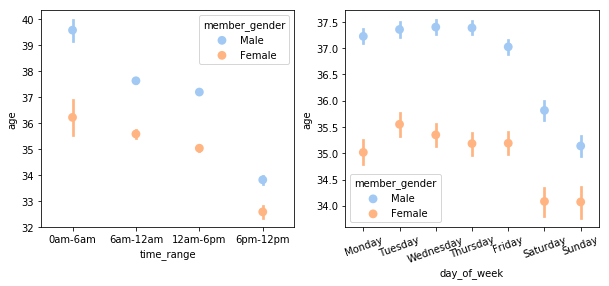

In [57]:
# age plot by time range, day of week and gender variables
plt.figure(figsize=[10,4])

plt.subplot(121)
sb.pointplot(data=gobike_no_outlier,x='time_range',y='age',hue='member_gender',hue_order=['Male','Female'],
            linestyles='', palette='pastel')

plt.subplot(122)
sb.pointplot(data=gobike_no_outlier,x='day_of_week',y='age',hue='member_gender',hue_order=['Male','Female'],
            linestyles='', palette='pastel')
plt.xticks(rotation=20)

plt.show()

The age of the male members are higher than the age of the female members. The age tends to have negative correlation with time range for both male and female. Younger male and female members tend to ride GoBike more during Sat-Sun.

Lastly, the trip duration, distance and velocity are plotted by time range and day type variables.

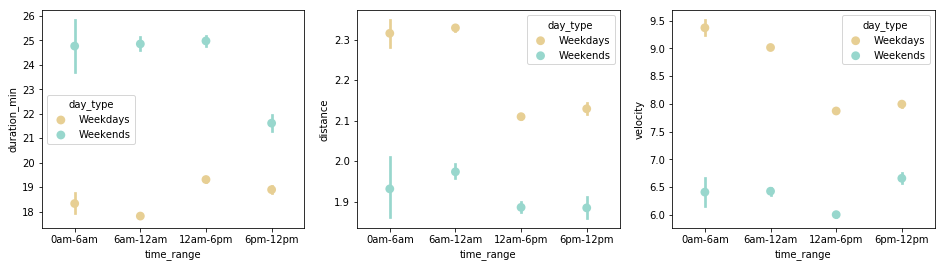

In [58]:
# duration, distance and velocity plot by time range and day type variables
plt.figure(figsize=[16,4])

plt.subplot(131)
sb.pointplot(data=gobike_no_outlier,x='time_range',y='duration_min',hue='day_type',
            linestyles='',palette='BrBG')

plt.subplot(132)
sb.pointplot(data=gobike_no_outlier,x='time_range',y='distance',hue='day_type',
            linestyles='',palette='BrBG')

plt.subplot(133)
sb.pointplot(data=gobike_no_outlier,x='time_range',y='velocity',hue='day_type',
            linestyles='',palette='BrBG')

plt.show()

During weekdays, members tend to use Gobike for longer duration in the morning period. In contrast, they tend to use Gobike longer during weekends. The distance they travelled during weekdays is longer than during weekends and the distance is the longest during 6am-12am for both cases. Velocity that members rode Gobike is the lowest during 12am-6pm in both weekdays and weekends, while the highest velocity in weekdays is during 0am-6am and in weekends during 6pm-12pm.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The female members tend to take longer time using GoBike during 12am-6pm than the other time ranges. Where as,the male members took shorter time during 6am-12am than the other time ranges. Both male and female members travel in slightly longer distance with higher velocity in the morning than afternoon. They both have similar trend of GoBike usage behavior during the day of the week. That is, the duration during weekdays was shorter than weekends. Sunday tends to be the day that both male and female members ride the Gobike the shortest distance with slowest velocity. Different trends between using Gobike in weekdays and weekends were also found in the relationship of duration, distance and velocity with the time range.

### Were there any interesting or surprising interactions between features?

Interestingly, the age of users tends to have negative correlation with time range for both male and female. Additionally, younger male and female members tend to ride GoBike more during Sat-Sun.

### References

[1] https://s3.amazonaws.com/fordgobike-data/index.html <br>
[2] https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude/43211266#43211266 <br>
[3] https://en.wikipedia.org/wiki/Ford_GoBike